<a href="https://colab.research.google.com/github/georgy43/Data_Analytics/blob/main/Project1_EDA_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Exploratory Data Analysis (EDA) on Retail Sales Data
**Level:** 1  

---
## Objective
Perform exploratory data analysis on a retail sales dataset to uncover patterns, trends, and actionable business insights.

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Plot styling
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


## 2. Load the Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 3. Data Cleaning & Preprocessing

In [ ]:
# Check data types and missing values
print('=== Data Types ===')
print(df.dtypes)
print('\n=== Missing Values ===')
print(df.isnull().sum())
print('\n=== Duplicate Rows ===')
print(df.duplicated().sum())

=== Data Types ===
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

=== Missing Values ===
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

=== Duplicate Rows ===
0


In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time features
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b')
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

print('✅ Date features extracted!')
df[['Date','Month','Month_Name','Day_of_Week','Quarter']].head()

✅ Date features extracted!


,Date,Month,Month_Name,Day_of_Week,Quarter
0,2023-11-24,11,Nov,Friday,4
1,2023-02-27,2,Feb,Monday,1
2,2023-01-13,1,Jan,Friday,1
3,2023-05-21,5,May,Sunday,2
4,2023-05-06,5,May,Saturday,2


## 4. Descriptive Statistics

In [ ]:
print('=== Descriptive Statistics ===')
df[['Age','Quantity','Price per Unit','Total Amount']].describe().round(2)

In [ ]:
# Key business metrics
print(f"💰 Total Revenue        : ₹{df['Total Amount'].sum():,.0f}")
print(f"📦 Total Transactions   : {len(df):,}")
print(f"👤 Unique Customers     : {df['Customer ID'].nunique():,}")
print(f"🛍️  Avg Transaction Value: ₹{df['Total Amount'].mean():,.2f}")
print(f"📊 Median Order Value   : ₹{df['Total Amount'].median():,.2f}")
print(f"🔼 Max Single Purchase  : ₹{df['Total Amount'].max():,}")

💰 Total Revenue        : ₹456,000
📦 Total Transactions   : 1,000
👤 Unique Customers     : 1,000
🛍️  Avg Transaction Value: ₹456.00
📊 Median Order Value   : ₹135.00
🔼 Max Single Purchase  : ₹2,000


## 5. Time Series Analysis

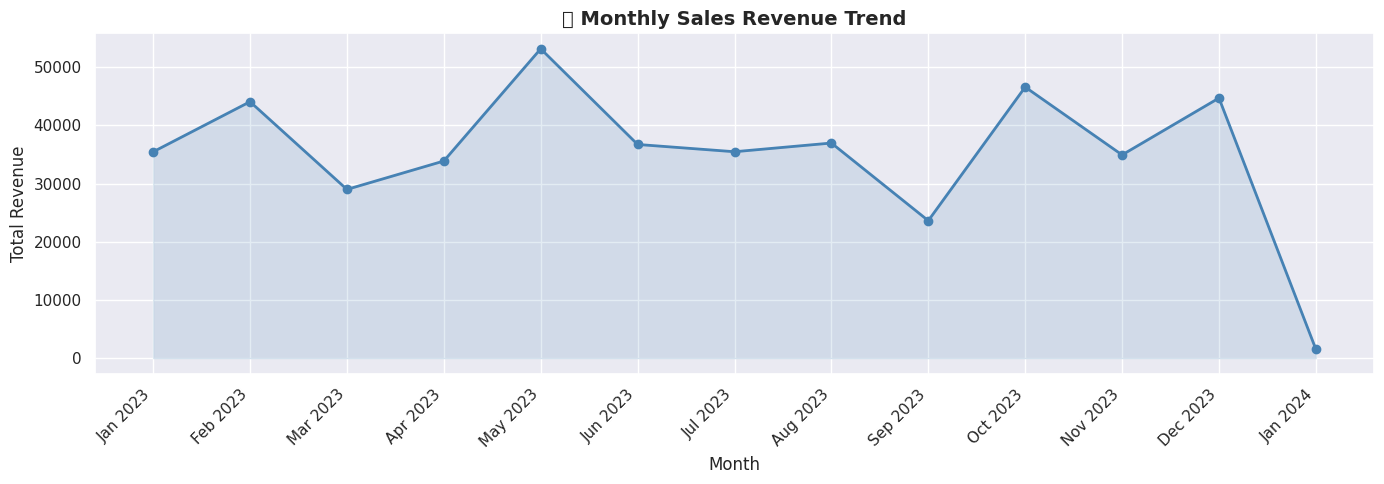

In [ ]:
# Monthly sales trend
monthly_sales = df.groupby(['Year','Month','Month_Name'])['Total Amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['Year','Month'])
monthly_sales['Period'] = monthly_sales['Month_Name'] + ' ' + monthly_sales['Year'].astype(str)

plt.figure(figsize=(14,5))
plt.plot(monthly_sales['Period'], monthly_sales['Total Amount'], marker='o', color='steelblue', linewidth=2)
plt.fill_between(monthly_sales['Period'], monthly_sales['Total Amount'], alpha=0.15, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title('📈 Monthly Sales Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=150, bbox_inches='tight')
plt.show()

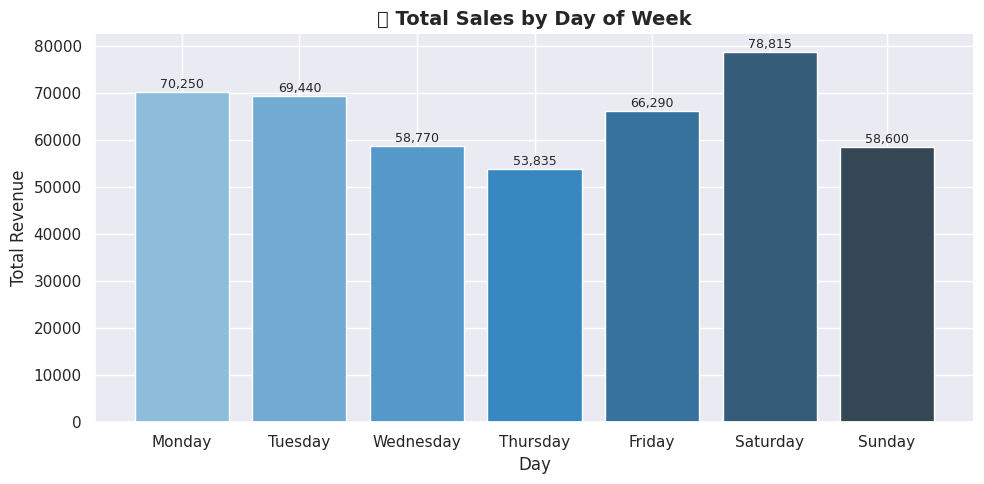

In [ ]:
# Sales by day of week
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_sales = df.groupby('Day_of_Week')['Total Amount'].sum().reindex(day_order)

plt.figure(figsize=(10,5))
bars = plt.bar(day_sales.index, day_sales.values, color=sns.color_palette('Blues_d', 7))
plt.title('📅 Total Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('sales_by_day.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Customer & Product Analysis

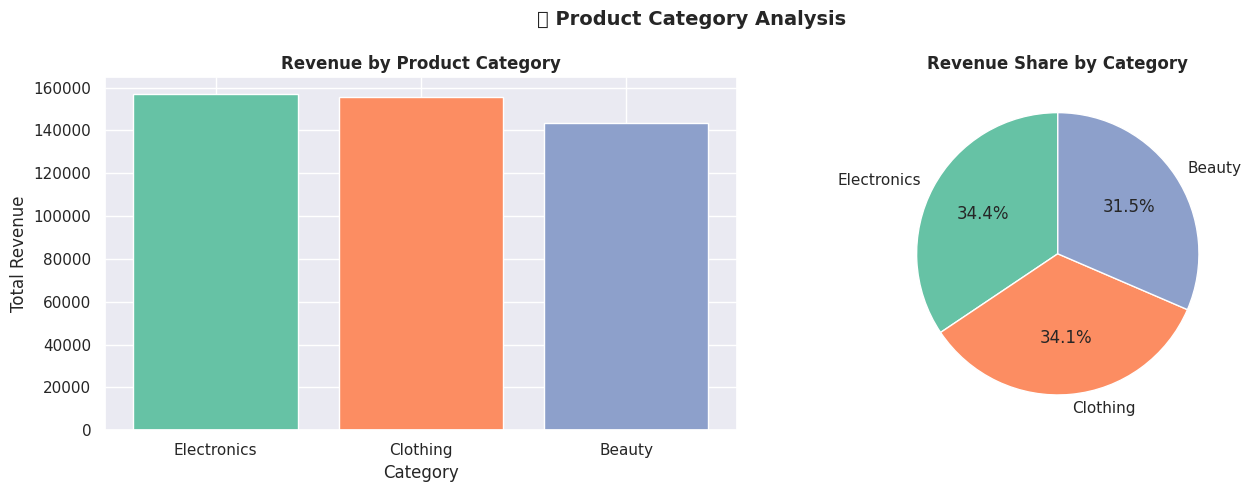

In [ ]:
# Sales by product category
cat_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(cat_sales.index, cat_sales.values, color=sns.color_palette('Set2', len(cat_sales)))
axes[0].set_title('Revenue by Product Category', fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Revenue')

# Pie chart
axes[1].pie(cat_sales.values, labels=cat_sales.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set2', len(cat_sales)), startangle=90)
axes[1].set_title('Revenue Share by Category', fontweight='bold')

plt.suptitle('🛍️ Product Category Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('category_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

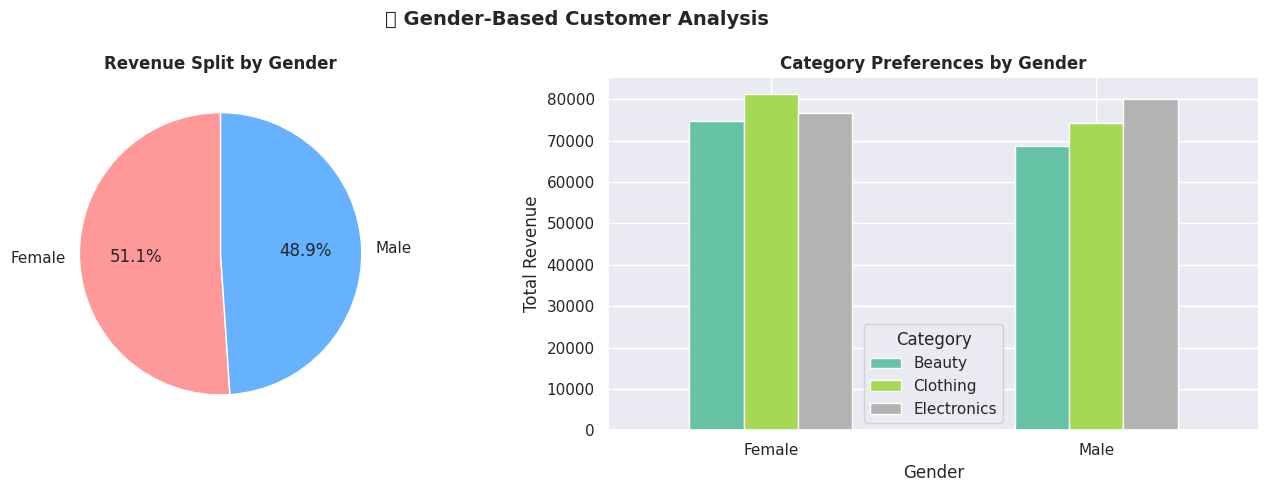

In [ ]:
# Gender analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

gender_rev = df.groupby('Gender')['Total Amount'].sum()
axes[0].pie(gender_rev, labels=gender_rev.index, autopct='%1.1f%%',
            colors=['#FF9999','#66B2FF'], startangle=90)
axes[0].set_title('Revenue Split by Gender', fontweight='bold')

gender_cat = df.groupby(['Gender','Product Category'])['Total Amount'].sum().unstack()
gender_cat.plot(kind='bar', ax=axes[1], colormap='Set2')
axes[1].set_title('Category Preferences by Gender', fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Category')

plt.suptitle('👥 Gender-Based Customer Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('gender_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

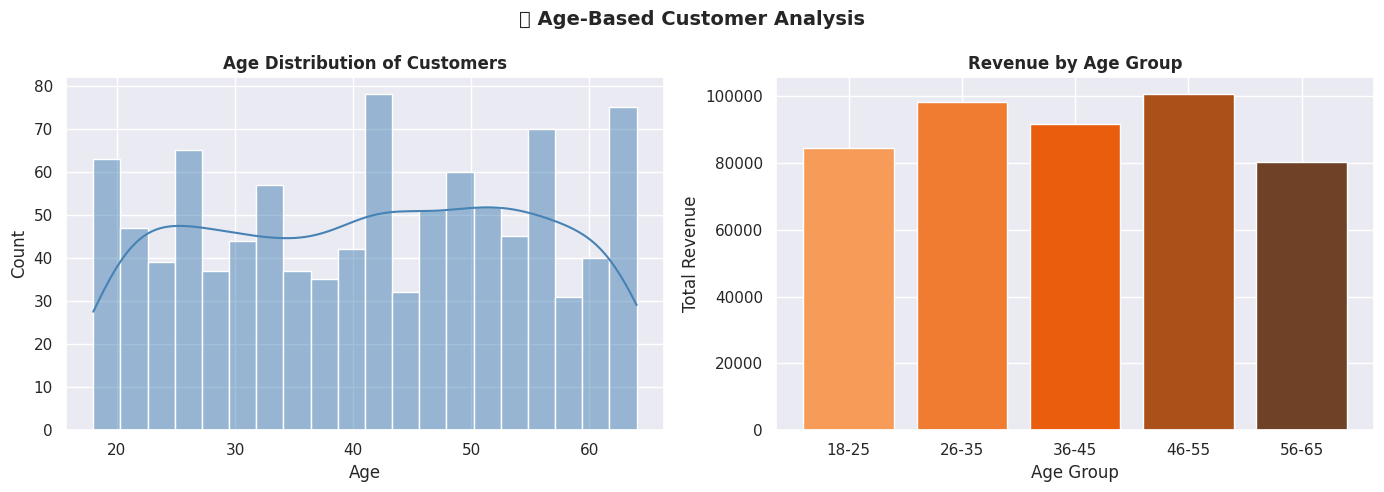

In [ ]:
# Age distribution
df['Age Group'] = pd.cut(df['Age'], bins=[17,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56-65'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Age'], bins=20, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title('Age Distribution of Customers', fontweight='bold')
axes[0].set_xlabel('Age')

age_revenue = df.groupby('Age Group', observed=True)['Total Amount'].sum()
axes[1].bar(age_revenue.index.astype(str), age_revenue.values,
            color=sns.color_palette('Oranges_d', len(age_revenue)))
axes[1].set_title('Revenue by Age Group', fontweight='bold')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Revenue')

plt.suptitle('🎂 Age-Based Customer Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('age_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Correlation Heatmap

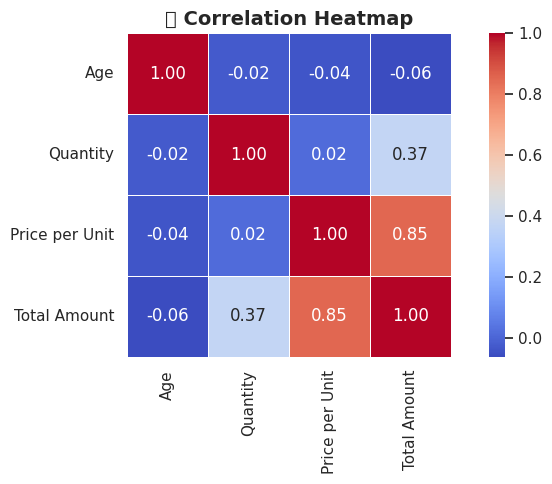

In [ ]:
plt.figure(figsize=(8, 5))
corr = df[['Age','Quantity','Price per Unit','Total Amount']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('🔥 Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Summary & Recommendations

In [ ]:
top_category = cat_sales.idxmax()
top_day = day_sales.idxmax()
top_age = age_revenue.idxmax()
top_gender = gender_rev.idxmax()

print('=' * 55)
print('       📊 EDA SUMMARY & KEY INSIGHTS')
print('=' * 55)
print(f'  🏆 Top Revenue Category : {top_category}')
print(f'  📅 Best Sales Day       : {top_day}')
print(f'  🎂 Highest Spending Age : {top_age}')
print(f'  👤 Top Spending Gender  : {top_gender}')
print(f"  💰 Total Revenue        : ₹{df['Total Amount'].sum():,.0f}")
print(f"  📦 Avg Order Value      : ₹{df['Total Amount'].mean():,.2f}")
print('=' * 55)
print()
print('📌 RECOMMENDATIONS:')
print(f'  1. Increase promotions in {top_category} — highest revenue driver.')
print(f'  2. Run weekend campaigns on {top_day} for maximum footfall.')
print(f'  3. Target {top_age} age group with loyalty programs.')
print(f'  4. Personalize offers for {top_gender} customers.')
print('  5. Use slow months for clearance sales to boost revenue.')

       📊 EDA SUMMARY & KEY INSIGHTS
  🏆 Top Revenue Category : Electronics
  📅 Best Sales Day       : Saturday
  🎂 Highest Spending Age : 46-55
  👤 Top Spending Gender  : Female
  💰 Total Revenue        : ₹456,000
  📦 Avg Order Value      : ₹456.00

📌 RECOMMENDATIONS:
  1. Increase promotions in Electronics — highest revenue driver.
  2. Run weekend campaigns on Saturday for maximum footfall.
  3. Target 46-55 age group with loyalty programs.
  4. Personalize offers for Female customers.
  5. Use slow months for clearance sales to boost revenue.
